In [1]:
import pandas as pd
import logomaker as lm
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import lacroix

import json 

sns.set_style('white')

Matplotlib is building the font cache; this may take a moment.


In [2]:
amypro = pd.read_pickle('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/seqplotting/serum_segmented.pkl')
amypro['name'] = amypro['Unnamed: 0'].apply(lambda x: f'Tau_{int(x)*50}-{int(x+1)*50}')
amypro['name'] = amypro['name'].apply(lambda x: x.replace('Tau', 'serum'))
amypro

,Unnamed: 0,sequence,res_value_bool,name,length,frag_len,data_split_fold1,data_split_fold2,data_split_fold3,data_split_fold4,data_split_fold5,predictions_0,predictions_1,predictions_2,predictions_3,predictions_4,prediction_avg
0,0.0,RSFFSFLGEAFDGARDMWRAYSDMREANYIGSDKYFHARGNYDAAK...,NaN,serum_0-50,104.0,50.0,test,test,test,test,test,"[0.65017307, 0.6713219, 0.68185604, 0.64089626...","[0.6741351, 0.6717808, 0.68126166, 0.6292727, ...","[0.38218823, 0.38273758, 0.37485713, 0.3808741...","[0.3949066, 0.43737948, 0.42647564, 0.51426, 0...","[0.59071624, 0.5614897, 0.5841183, 0.6061718, ...","[0.5384238243103028, 0.5449419021606445, 0.549..."
1,1.0,GVWAAEAISDARENIQRFFGHGAEDSLADQAANEWGRSGKDPNHFR...,NaN,serum_50-100,104.0,50.0,test,test,test,test,test,"[0.6766563, 0.8162689, 0.7989403, 0.8664956, 0...","[0.8205224, 0.80164284, 0.8422812, 0.88739944,...","[0.5281454, 0.8034341, 0.64190763, 0.79262376,...","[0.5925117, 0.69105893, 0.79733187, 0.927646, ...","[0.7309061, 0.7308944, 0.74062014, 0.8268653, ...","[0.6697484016418457, 0.7686598300933838, 0.764..."
2,2.0,PEKY,NaN,serum_100-150,104.0,4.0,test,test,test,test,test,"[7.526459e-08, 1.93355e-10, 1.965574e-09, 3.54...","[1.4167838e-10, 4.640064e-13, 4.5338677e-08, 3...","[4.751421e-10, 6.3925584e-12, 9.010449e-12, 0....","[3.8757855e-10, 4.212381e-12, 7.8555615e-08, 0...","[2.6533313e-09, 1.4498175e-10, 2.4889468e-06, ...","[1.5784462448209525e-08, 6.988113421257936e-11..."


In [3]:
def hex_to_rgb(hex_code):
    """Convert a hex color code to an RGB tuple in the range of 0 to 1."""
    # Remove the hash symbol if it exists
    hex_code = hex_code.lstrip('#')
    
    # Convert the hex code to RGB values
    r = int(hex_code[0:2], 16) / 255.0
    g = int(hex_code[2:4], 16) / 255.0
    b = int(hex_code[4:6], 16) / 255.0
    
    return np.array([r, g, b])

In [4]:
lcb = hex_to_rgb(lacroix.colorList('Berry')[4])
lcg = hex_to_rgb(lacroix.colorList('Lime')[2])

d = {'R': lcb,
 'r': lcb,
 'K': lcb,
 'k': lcb,
 'D': lcb,
 'd': lcb,
 'E': lcb,
 'e': lcb,
 'N': lcb,
 'n': lcb,
 'Q': lcb,
 'q': lcb,
 'S': lcg,
 's': lcg,
 'G': lcg,
 'g': lcg,
 'H': lcg,
 'h': lcg,
 'T': lcg,
 't': lcg,
 'A': lcg,
 'a': lcg,
 'P': lcg,
 'p': lcg,
 'Y': np.array([0., 0., 0.]),
 'y': np.array([0., 0., 0.]),
 'V': np.array([0., 0., 0.]),
 'v': np.array([0., 0., 0.]),
 'M': np.array([0., 0., 0.]),
 'm': np.array([0., 0., 0.]),
 'C': np.array([0., 0., 0.]),
 'c': np.array([0., 0., 0.]),
 'L': np.array([0., 0., 0.]),
 'l': np.array([0., 0., 0.]),
 'F': np.array([0., 0., 0.]),
 'f': np.array([0., 0., 0.]),
 'I': np.array([0., 0., 0.]),
 'i': np.array([0., 0., 0.]),
 'W': np.array([0., 0., 0.]),
 'w': np.array([0., 0., 0.])}

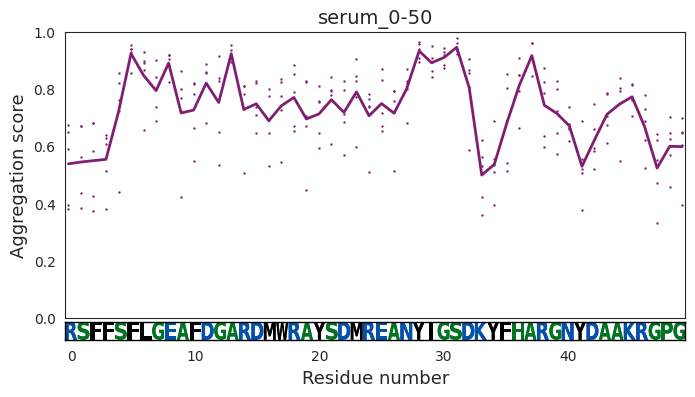

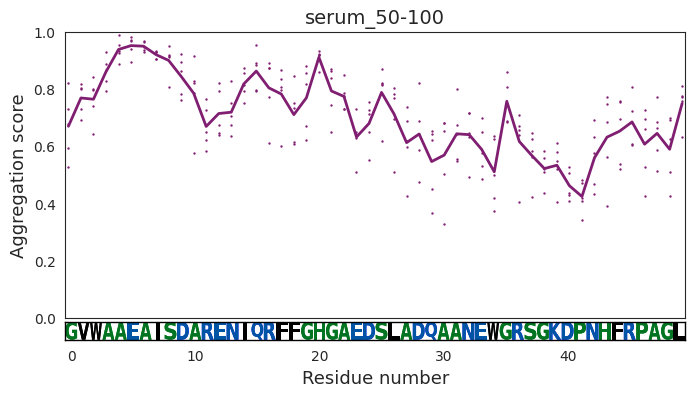

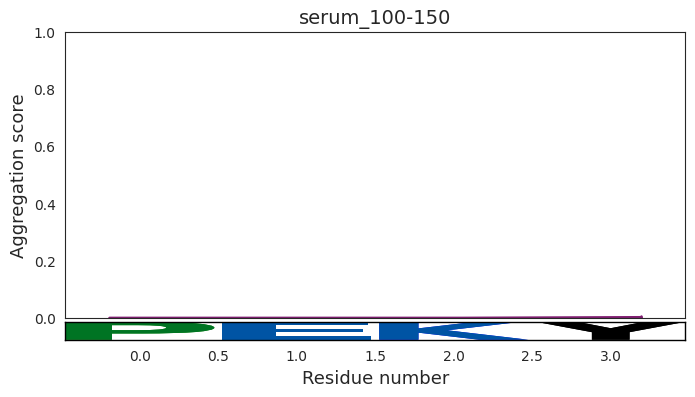

In [5]:
ctr = 0
for row in amypro.iterrows():
    if len(row[1]['sequence']) < 100:
        name = row[1]['name']
        index = row[0]
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [4, 0.25], 'hspace': 0.025})  
        ax1.plot(amypro[amypro['name'] == name]['prediction_avg'][index], color=lacroix.colorList('Berry')[2], lw=2)
        for j in range(5):
            ax1.scatter(range(len(row[1][f'predictions_{j}'])), amypro[amypro['name'] == name][f'predictions_{j}'][index], color=lacroix.colorList('Berry')[2], s=0.5)
      
        ax1.set_ylabel('Aggregation score', fontsize=13)
        input_string = str(amypro[amypro['name'] == name]['sequence'].reset_index(drop=True)[0])
        ax1.set_title(name, fontsize=14)
        wt_seq = input_string
        count_df = lm.alignment_to_matrix([wt_seq], to_type='counts')
        ax1.set_xlim([0-0.25,len(input_string)-1+0.25])
        ax1.set_ylim([0,1])
        
        logo_wt = lm.Logo(count_df, color_scheme='hydrophobicity', ax=ax2)
        logo_wt.rgb_dict = d 
        logo_wt._compute_glyphs()
        logo_wt.draw()

        #for i in row[1]['regions']:
        #    if type(i) == str:
        #        pmin = int(i.split('-')[0])
        #        pmax = int(i.split('-')[1])
        #        logo_wt.highlight_position_range(pmin=pmin, pmax=pmax, color=lacroix.colorList('CranRaspberry')[2], alpha=0.4)
        
        logo_wt.ax.set_title('')
        logo_wt.ax.xaxis.set_ticks_position('none')
        logo_wt.style_spines(spines=['top', 'bottom', 'left', 'right'], visible=True)
        logo_wt.ax.get_yaxis().set_visible(False)
        ax1.get_xaxis().set_visible(False)
        plt.xlabel('Residue number', fontsize=13)
        
        #plt.show()
        fig.savefig(f'/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/seqplotting/seg_pngs/{name}.png', dpi=500, bbox_inches='tight')